In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

In [2]:
# Load the data
data = pd.read_csv("/Users/amnagul/Desktop/Spring 2025 Semester/DSO 510/Final Project/Data and Code/pga_tour_stats_2020.csv")
print(data.shape)

# Extract the relevant columns
data = data[["SCORING_AVG_OVERALL", "TEE_AVG_DRIVING_DISTANCE", "TEE_AVG_SMASH_FACTOR", "GIR_PCT_OVERALL", "TEE_AVG_FIR_PCT"]].dropna()
print(data.shape)


(357, 73)
(208, 5)


In [3]:
data.head()

,SCORING_AVG_OVERALL,TEE_AVG_DRIVING_DISTANCE,TEE_AVG_SMASH_FACTOR,GIR_PCT_OVERALL,TEE_AVG_FIR_PCT
0,71.705,280.9,1.482,63.47,62.16
1,71.927,298.0,1.509,62.20,45.78
2,71.073,295.0,1.509,69.63,57.83
3,72.106,303.7,1.502,64.36,51.69
4,71.407,288.5,1.487,64.81,58.05


# EDA

In [6]:
print(data.head())
print(data.tail())
print(data.describe().T)
print(data.info())

   SCORING_AVG_OVERALL  TEE_AVG_DRIVING_DISTANCE  TEE_AVG_SMASH_FACTOR  \
0               71.705                     280.9                 1.482   
1               71.927                     298.0                 1.509   
2               71.073                     295.0                 1.509   
3               72.106                     303.7                 1.502   
4               71.407                     288.5                 1.487   

   GIR_PCT_OVERALL  TEE_AVG_FIR_PCT  
0            63.47            62.16  
1            62.20            45.78  
2            69.63            57.83  
3            64.36            51.69  
4            64.81            58.05  
     SCORING_AVG_OVERALL  TEE_AVG_DRIVING_DISTANCE  TEE_AVG_SMASH_FACTOR  \
203               69.127                     307.6                 1.487   
204               69.930                     305.4                 1.486   
205               71.206                     301.7                 1.504   
206               71.24

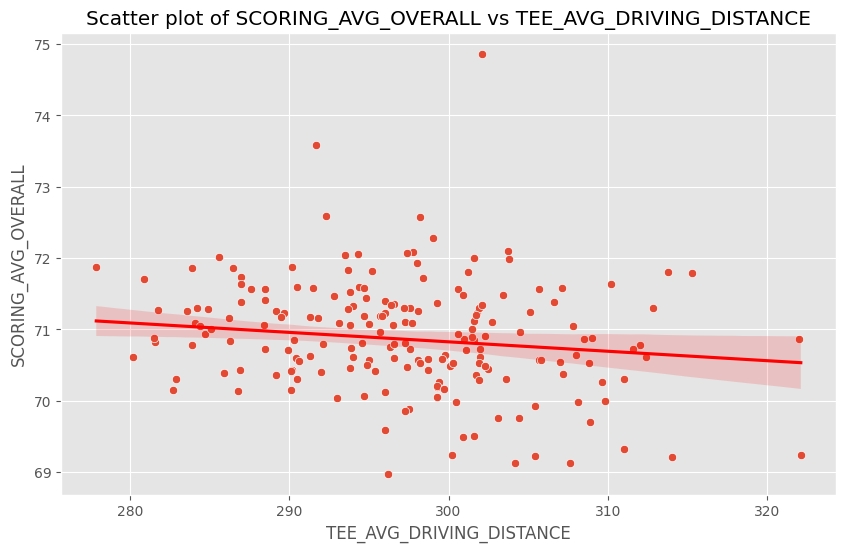

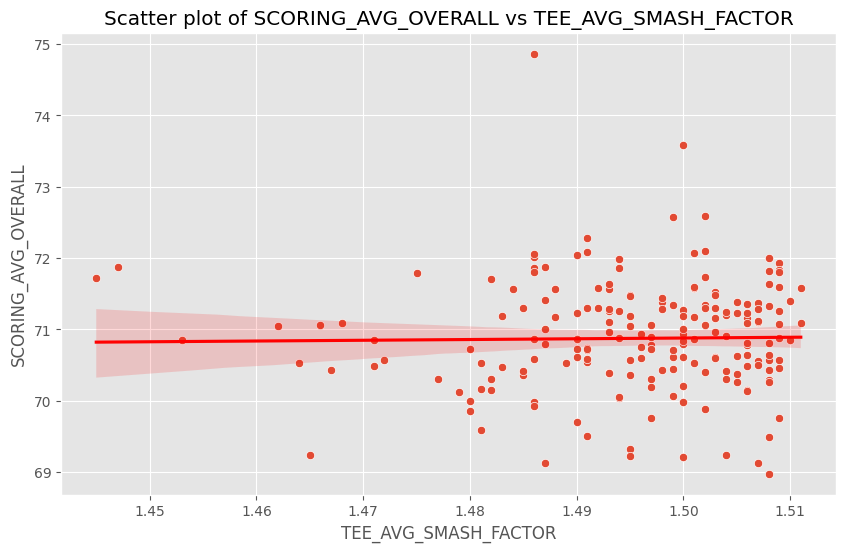

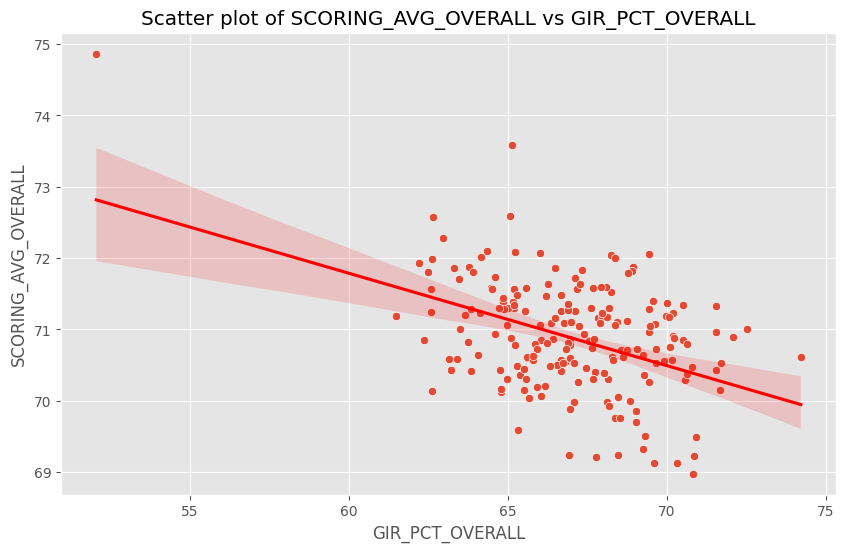

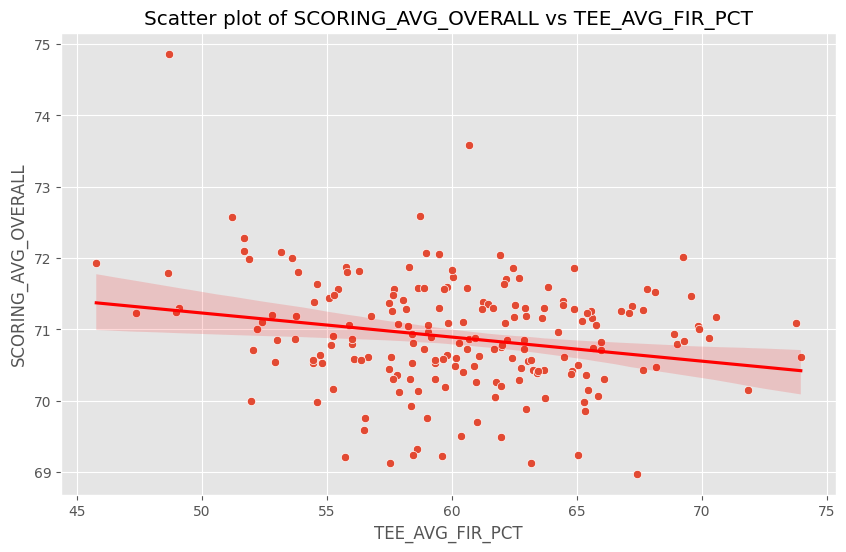

In [11]:
columns = ["TEE_AVG_DRIVING_DISTANCE", "TEE_AVG_SMASH_FACTOR", "GIR_PCT_OVERALL", "TEE_AVG_FIR_PCT"]
for column in columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[column], y=data["SCORING_AVG_OVERALL"])
    sns.regplot(x=data[column], y=data["SCORING_AVG_OVERALL"], scatter=False, color='red')
    plt.title(f'Scatter plot of SCORING_AVG_OVERALL vs {column}')
    plt.xlabel(column)
    plt.ylabel('SCORING_AVG_OVERALL')
    plt.savefig(f'scatter_plot_{column}.png')
    plt.show()

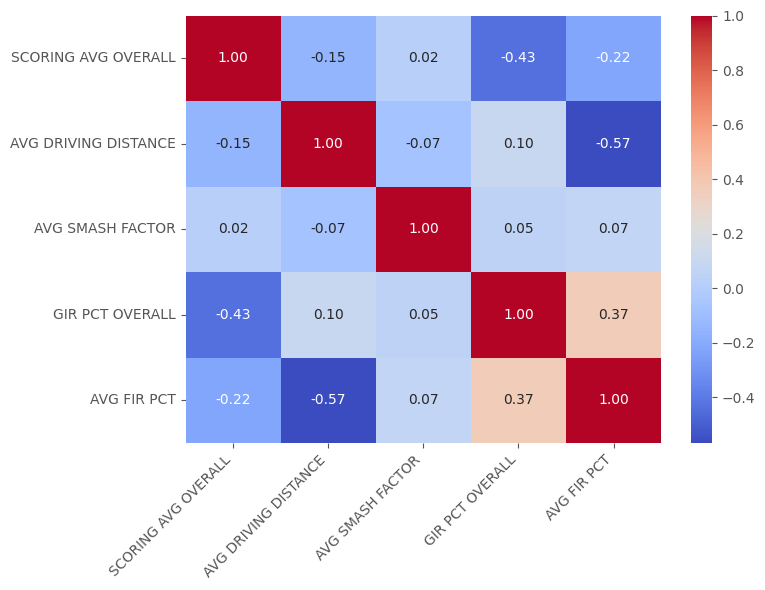

In [12]:
corr_matrix = data.corr()

# Rename columns by removing underscores and 'TEE'
renamed_labels = {col: col.replace('TEE_', '').replace('_', ' ') for col in data.columns}
corr_matrix.rename(index=renamed_labels, columns=renamed_labels, inplace=True)

plt.figure(figsize=(8, 6))  # Increase figure size slightly
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # Adjust layout to prevent cut-off
# plt.savefig('corr_heatmap.png', dpi=300)
plt.show()

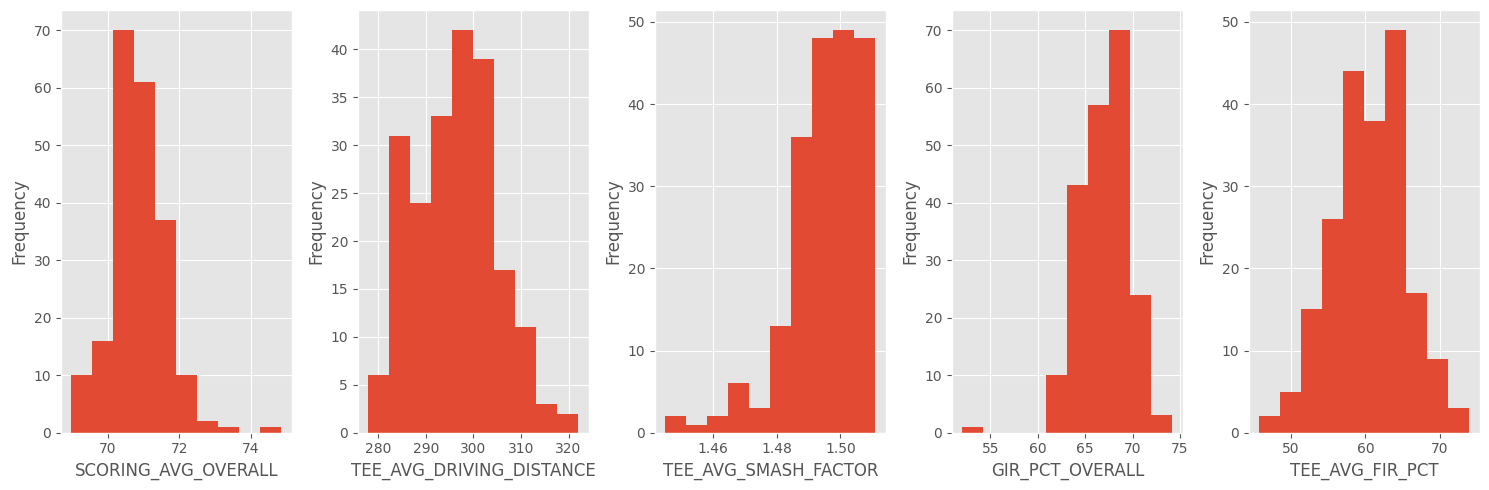

In [15]:
# Create a figure and axes for the subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 5))  # 1 row, 3 columns

# Iterate through the first three columns and create histograms
for i, col in enumerate(data.columns):
    axes[i].hist(data[col], bins=10)  # Adjust the number of bins as needed
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    # axes[i].set_title(f'Histogram of {col}')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Regression Analysis (Individual terms)

In [ ]:
# Fit the multiple linear regression model
scoreMLR = smf.ols('SCORING_AVG_OVERALL ~ TEE_AVG_DRIVING_DISTANCE + TEE_AVG_SMASH_FACTOR + GIR_PCT_OVERALL + TEE_AVG_FIR_PCT', data=data).fit()

# Print the model summary
print(scoreMLR.summary())

                             OLS Regression Results                            
Dep. Variable:     SCORING_AVG_OVERALL   R-squared:                       0.233
Model:                             OLS   Adj. R-squared:                  0.218
Method:                  Least Squares   F-statistic:                     15.40
Date:                 Wed, 26 Feb 2025   Prob (F-statistic):           5.10e-11
Time:                         11:12:20   Log-Likelihood:                -211.60
No. Observations:                  208   AIC:                             433.2
Df Residuals:                      203   BIC:                             449.9
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept     

In [31]:
# without interaction and without smash
scoreMLR = smf.ols('SCORING_AVG_OVERALL ~ TEE_AVG_DRIVING_DISTANCE + GIR_PCT_OVERALL + TEE_AVG_FIR_PCT', data=data).fit()

# Print the model summary
print(scoreMLR.summary())

                             OLS Regression Results                            
Dep. Variable:     SCORING_AVG_OVERALL   R-squared:                       0.232
Model:                             OLS   Adj. R-squared:                  0.221
Method:                  Least Squares   F-statistic:                     20.52
Date:                 Wed, 26 Feb 2025   Prob (F-statistic):           1.16e-11
Time:                         12:04:50   Log-Likelihood:                -211.74
No. Observations:                  208   AIC:                             431.5
Df Residuals:                      204   BIC:                             444.8
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept     

# Regression Analysis (Interaction terms)

In [25]:
# Fit the interaction model
scoreMLR_drive_smash = smf.ols('SCORING_AVG_OVERALL ~ TEE_AVG_DRIVING_DISTANCE * TEE_AVG_SMASH_FACTOR', data=data).fit()
print(scoreMLR_drive_smash.summary())

                             OLS Regression Results                            
Dep. Variable:     SCORING_AVG_OVERALL   R-squared:                       0.022
Model:                             OLS   Adj. R-squared:                  0.008
Method:                  Least Squares   F-statistic:                     1.547
Date:                 Wed, 26 Feb 2025   Prob (F-statistic):              0.204
Time:                         11:18:54   Log-Likelihood:                -236.83
No. Observations:                  208   AIC:                             481.7
Df Residuals:                      204   BIC:                             495.0
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [26]:
# Fit the interaction model
scoreMLR_drive_gir = smf.ols('SCORING_AVG_OVERALL ~ TEE_AVG_DRIVING_DISTANCE * GIR_PCT_OVERALL', data=data).fit()
print(scoreMLR_drive_gir.summary())

                             OLS Regression Results                            
Dep. Variable:     SCORING_AVG_OVERALL   R-squared:                       0.233
Model:                             OLS   Adj. R-squared:                  0.222
Method:                  Least Squares   F-statistic:                     20.66
Date:                 Wed, 26 Feb 2025   Prob (F-statistic):           9.88e-12
Time:                         11:19:54   Log-Likelihood:                -211.57
No. Observations:                  208   AIC:                             431.1
Df Residuals:                      204   BIC:                             444.5
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [27]:
scoreMLR_drive_fir = smf.ols('SCORING_AVG_OVERALL ~ TEE_AVG_DRIVING_DISTANCE * TEE_AVG_FIR_PCT', data=data).fit()
print(scoreMLR_drive_fir.summary())

                             OLS Regression Results                            
Dep. Variable:     SCORING_AVG_OVERALL   R-squared:                       0.167
Model:                             OLS   Adj. R-squared:                  0.155
Method:                  Least Squares   F-statistic:                     13.63
Date:                 Wed, 26 Feb 2025   Prob (F-statistic):           3.87e-08
Time:                         11:20:46   Log-Likelihood:                -220.17
No. Observations:                  208   AIC:                             448.3
Df Residuals:                      204   BIC:                             461.7
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [28]:
scoreMLR_drive_fir_gir = smf.ols('SCORING_AVG_OVERALL ~ TEE_AVG_DRIVING_DISTANCE * GIR_PCT_OVERALL* TEE_AVG_FIR_PCT', data=data).fit()
print(scoreMLR_drive_fir_gir.summary())

                             OLS Regression Results                            
Dep. Variable:     SCORING_AVG_OVERALL   R-squared:                       0.293
Model:                             OLS   Adj. R-squared:                  0.268
Method:                  Least Squares   F-statistic:                     11.82
Date:                 Wed, 26 Feb 2025   Prob (F-statistic):           1.43e-12
Time:                         11:22:59   Log-Likelihood:                -203.16
No. Observations:                  208   AIC:                             422.3
Df Residuals:                      200   BIC:                             449.0
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [30]:
# Fit the multiple linear regression model
scoreMLR_greens = smf.ols('SCORING_AVG_OVERALL ~ GIR_PCT_OVERALL', data=data).fit()

# Print the model summary
print(scoreMLR_greens.summary())

                             OLS Regression Results                            
Dep. Variable:     SCORING_AVG_OVERALL   R-squared:                       0.188
Model:                             OLS   Adj. R-squared:                  0.185
Method:                  Least Squares   F-statistic:                     47.83
Date:                 Wed, 26 Feb 2025   Prob (F-statistic):           5.73e-11
Time:                         12:01:34   Log-Likelihood:                -217.45
No. Observations:                  208   AIC:                             438.9
Df Residuals:                      206   BIC:                             445.6
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          79.5530      

# SubGroup Analysis

In [3]:
data["TEE_AVG_DRIVING_DISTANCE"].describe()

count    208.000000
mean     296.368750
std        8.448773
min      277.900000
25%      290.050000
50%      296.450000
75%      301.725000
max      322.100000
Name: TEE_AVG_DRIVING_DISTANCE, dtype: float64

In [4]:
bins = [0, 290.050000, 301.725000, 322.100000]
labels = ['Short', 'Middle', 'Long']
data['DRIVING_DISTANCE_CATEGORICAL'] = pd.cut(data['TEE_AVG_DRIVING_DISTANCE'], bins=bins, labels=labels, right=False)

In [5]:
data.head()

,SCORING_AVG_OVERALL,TEE_AVG_DRIVING_DISTANCE,TEE_AVG_SMASH_FACTOR,GIR_PCT_OVERALL,TEE_AVG_FIR_PCT,DRIVING_DISTANCE_CATEGORICAL
0,71.705,280.9,1.482,63.47,62.16,Short
1,71.927,298.0,1.509,62.20,45.78,Middle
2,71.073,295.0,1.509,69.63,57.83,Middle
3,72.106,303.7,1.502,64.36,51.69,Long
4,71.407,288.5,1.487,64.81,58.05,Short


In [ ]:
scoreMLR_drive_fir_gir = smf.ols('SCORING_AVG_OVERALL ~ TEE_AVG_DRIVING_DISTANCE * GIR_PCT_OVERALL* TEE_AVG_FIR_PCT', data=data).fit()
print(scoreMLR_drive_fir_gir.summary())

In [6]:
# Fit the linear regression model with 'make' as a categorical variable
dd_cat = smf.ols("SCORING_AVG_OVERALL ~ DRIVING_DISTANCE_CATEGORICAL", data=data).fit()

# Print the summary of the model
print(dd_cat.summary2())

                            Results: Ordinary least squares
Model:                     OLS                       Adj. R-squared:           0.002   
Dependent Variable:        SCORING_AVG_OVERALL       AIC:                      475.8700
Date:                      2025-02-26 20:52          BIC:                      485.8681
No. Observations:          207                       Log-Likelihood:           -234.93 
Df Model:                  2                         F-statistic:              1.257   
Df Residuals:              204                       Prob (F-statistic):       0.287   
R-squared:                 0.012                     Scale:                    0.57501 
---------------------------------------------------------------------------------------
                                        Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------------------------
Intercept                              70.8979   0.1052 674.

# Standardization

In [4]:
# standardizing dataframe
data_z = data.apply(stats.zscore)
data_z.head()



,SCORING_AVG_OVERALL,TEE_AVG_DRIVING_DISTANCE,TEE_AVG_SMASH_FACTOR,GIR_PCT_OVERALL,TEE_AVG_FIR_PCT
0,1.086389,-1.835304,-1.119424,-1.398540,0.319108
1,1.376940,0.193541,1.194409,-1.894078,-2.922726
2,0.259234,-0.162397,1.194409,1.005014,-0.537860
3,1.611213,0.869823,0.594527,-1.051273,-1.753054
4,0.696370,-0.933595,-0.690936,-0.875689,-0.494319


In [5]:
# Fit the multiple linear regression model
scoreMLR_z = smf.ols('SCORING_AVG_OVERALL ~ TEE_AVG_DRIVING_DISTANCE + TEE_AVG_SMASH_FACTOR + GIR_PCT_OVERALL + TEE_AVG_FIR_PCT', data=data_z).fit()

# Print the model summary
print(scoreMLR_z.summary())

                             OLS Regression Results                            
Dep. Variable:     SCORING_AVG_OVERALL   R-squared:                       0.233
Model:                             OLS   Adj. R-squared:                  0.218
Method:                  Least Squares   F-statistic:                     15.40
Date:                 Thu, 27 Feb 2025   Prob (F-statistic):           5.10e-11
Time:                         09:59:24   Log-Likelihood:                -267.57
No. Observations:                  208   AIC:                             545.1
Df Residuals:                      203   BIC:                             561.8
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept     